In [19]:
# Python setup
# Turn on Camera
# Empty board calibration (find corners)
# Start game (capture photo)
# Infer piece positions per row
# Compare board states
# Determine the move made
# Record the move
# Proceed with next turn until game over

# Environment setup
# Install 3rd-party Python Modules
!pip install cairosvg

# Mount Google Drive to Colab VM
# Current location: /gdrive/My Drive/Colab Notebooks/project-checkmate/
from google.colab import drive
drive.mount('/gdrive')

import chess
import chess.pgn
import chess.svg
import numpy as np

# Configure matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Utility class
# Generalized image display function
def display_image(img):
  if img.ndim == 2:
    print("Displaying Grayscale image:")
    plt.imshow(img, cmap='gray')
  else:
    print("Displaying Color image:")
    plt.imshow(img)
  plt.show()

# ChessGame class
print("project-checkmate v0.01")
board = chess.Board()
game = chess.pgn.Game()
game.headers["Event"] = "Event"
game.headers["Site"] = "Site"
game.headers["Date"] = "Date"
game.headers["Round"] = "Round #"
game.headers["White"] = "White"
game.headers["Black"] = "Black"

# Global variables
isStartOfGame = True
node = 0

# Populate by row from White side as 1st row
initial_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1, -1, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(initial_state, axis=0))

# Should be from BoardState class
def getBoardStateDiff(current_state, prev_state):
  global board
  state_diff = current_state - prev_state
  if board.turn == chess.BLACK:
    state_diff = -state_diff
  return state_diff

def getStartSquare(state_diff):
  start_point = np.unravel_index(state_diff.argmin(), state_diff.shape)
  print(start_point)
  start_square = chess.square(start_point[1], start_point[0])
  print(start_square)
  print(chess.square_name(start_square))
  return start_square

def getDestSquare(state_diff):
  dest_point = np.unravel_index(state_diff.argmax(), state_diff.shape)
  print(dest_point)
  dest_square = chess.square(dest_point[1], dest_point[0])
  print(chess.square_name(dest_square))
  return dest_square

def convertToChessMove(start_square, dest_square):
  move = chess.Move(start_square, dest_square)
  uci_move = chess.Move.uci(move)
  print("UCI move = " + uci_move)
  san_move = board.san(move)
  print("SAN move = " + san_move)
  return move

def executeMove(move):
  global isStartOfGame
  global node
  if isStartOfGame:
    node = game.add_variation(move)
    isStartOfGame = False
  else:
    node = node.add_variation(move)
  board.push(move)

# White's turn
print("Turn = " + str(board.turn))

# Move 1
prev_state = initial_state
# Sample move of White, populate by row from White side as 1st row
# Below is d2d4 move
# Should be from BoardState class
current_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  0,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  1,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1, -1, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(current_state, axis=0))

state_diff = getBoardStateDiff(current_state, prev_state)
start_square = getStartSquare(state_diff)
dest_square = getDestSquare(state_diff)
move = convertToChessMove(start_square, dest_square)
executeMove(move)
print("Turn = " + str(board.turn))

# Move 2
prev_state = current_state
# Sample move of White, populate by row from White side as 1st row
# Below is Nc6 move
current_state = np.array([[ 1,  1,  1,  1,  1,  1,  1,  1],
                          [ 1,  1,  1,  0,  1,  1,  1,  1],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0,  0,  1,  0,  0,  0,  0],
                          [ 0,  0,  0,  0,  0,  0,  0,  0],
                          [ 0,  0, -1,  0,  0,  0,  0,  0],
                          [-1, -1, -1, -1, -1, -1, -1, -1],
                          [-1,  0, -1, -1, -1, -1, -1, -1]])
# For visualization only
#print(np.flip(current_state, axis=0))

state_diff = getBoardStateDiff(current_state, prev_state)
start_square = getStartSquare(state_diff)
dest_square = getDestSquare(state_diff)
move = convertToChessMove(start_square, dest_square)
executeMove(move)
print("Turn = " + str(board.turn))

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
project-checkmate v0.01
Turn = True
(1, 3)
11
d2
(3, 3)
d4
UCI move = d2d4
SAN move = d4
Turn = False
(7, 1)
57
b8
(5, 2)
c6
UCI move = b8c6
SAN move = Nc6
Turn = True


(480, 640, 3)
Displaying Color image:


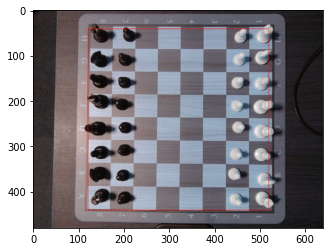

In [20]:
# https://stackoverflow.com/questions/62329331/load-svg-image-in-opencv
from cairosvg import svg2png
from io import BytesIO
from PIL import Image
import cv2

# Tools class
def chessSVGBoardToNumpyArray(board):
  # Convert chess.svg to PNG format
  board_png = svg2png(bytestring=chess.svg.board(board))

  # Read PNG image as RGBA color space
  pil_img = Image.open(BytesIO(board_png)).convert('RGBA')

  # Convert RGBA to BGRA to follow OpenCV convention
  cv_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGBA2BGRA)
  return cv_img

#cv_img = chessSVGBoardToNumpyArray(board)
#cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/chess-board-32.jpg')
#cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/chess-board-32.jpg', 0)
#cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/Copy of camera_test.jpg', 0)
#cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/camera_test.jpg')
cv_img = cv2.imread('/gdrive/My Drive/Colab Notebooks/project-checkmate/train02.jpg')
#cv_img = cv2.medianBlur(cv_img,5)
print(cv_img.shape)
#print(np.max(np.max(cv_img)))
#print(np.min(np.min(cv_img)))
#cv_img = cv2.adaptiveThreshold(cv_img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 0)
#print(ret)

from IPython.display import Image
cv_img = cv2.rectangle(cv_img, (121, 41), (520, 440), (255, 0, 0), 1)
display_image(cv_img)
#display(Image(cv_img))

#cv2.imwrite('/gdrive/My Drive/Colab Notebooks/project-checkmate/board.png', cv_img)

In [21]:
# (temp only) Generate Chess board without pieces
#empty_board = chessSVGBoardToNumpyArray(chess.Board(None))
empty_board = cv_img

# Locate inner corners
retval, inner_corners = cv2.findChessboardCorners(empty_board, (7, 7));
print(retval)

# Draw points on the inner corners
inner_corners = inner_corners[:, 0, :]
inner_corners = inner_corners[np.lexsort((inner_corners[:, 1], inner_corners[:, 0]))]
inner_corners = np.round(np.float32(inner_corners), 2)
print(inner_corners)
print(type(inner_corners))

print("dx = ")
print((np.max(inner_corners[:, 0]) - np.min(inner_corners[:, 0]))/(np.sqrt(len(inner_corners)) - 1.0))
dx = (np.max(inner_corners[:, 0]) - np.min(inner_corners[:, 0]))/(np.sqrt(len(inner_corners)) - 1.0)
print("dy = ")
print((np.max(inner_corners[:, 1]) - np.min(inner_corners[:, 1]))/(np.sqrt(len(inner_corners)) - 1.0))
dy = (np.max(inner_corners[:, 1]) - np.min(inner_corners[:, 1]))/(np.sqrt(len(inner_corners)) - 1.0)

# Estimate the four outermost corners (simple method)
four_corners = np.array([np.round(np.float32([np.min(inner_corners[:, 0]) - dx, np.min(inner_corners[:, 1]) - dy]), 2)])
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.max(inner_corners[:, 0]) + dx, np.min(inner_corners[:, 1]) - dy]), 2)]), axis=0)
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.min(inner_corners[:, 0]) - dx, np.max(inner_corners[:, 1]) + dy]), 2)]), axis=0)
four_corners = np.append(four_corners, np.array([np.round(np.float32([np.max(inner_corners[:, 0]) + dx, np.max(inner_corners[:, 1]) + dy]), 2)]), axis=0)
print(four_corners)
radius = 20          # Radius of circle
color = (255, 0, 0) # Blue color in BGR
thickness = 10       # Line thickness of 2 px
for c in range(0, len(four_corners)):
  corner = four_corners[c]
  empty_board = cv2.circle(empty_board, (corner[0], corner[1]), radius, color, thickness)

display_image(empty_board)

False


TypeError: ignored

In [ ]:
a = np.array([[1, 2], [3, 4], [1, 3]])
a[np.argsort(a[:, 1])]